In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/soumy/Python Project/PIMA Diabeties/diabetes.csv")

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualization

<Axes: ylabel='Count'>

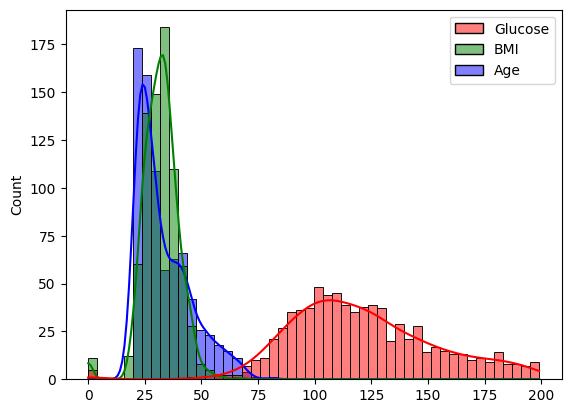

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot([df["Glucose"],df["BMI"],df["Age"]], kde=True, bins=50, alpha=0.5, palette=["red","green","blue"])

<Axes: >

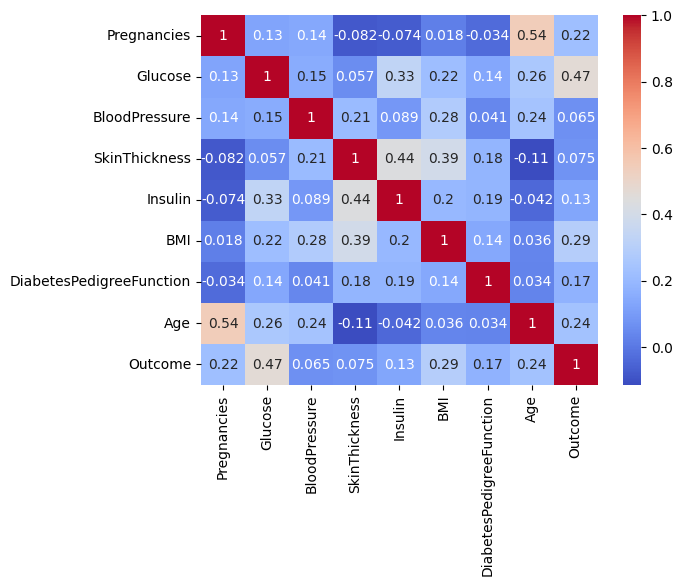

In [5]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

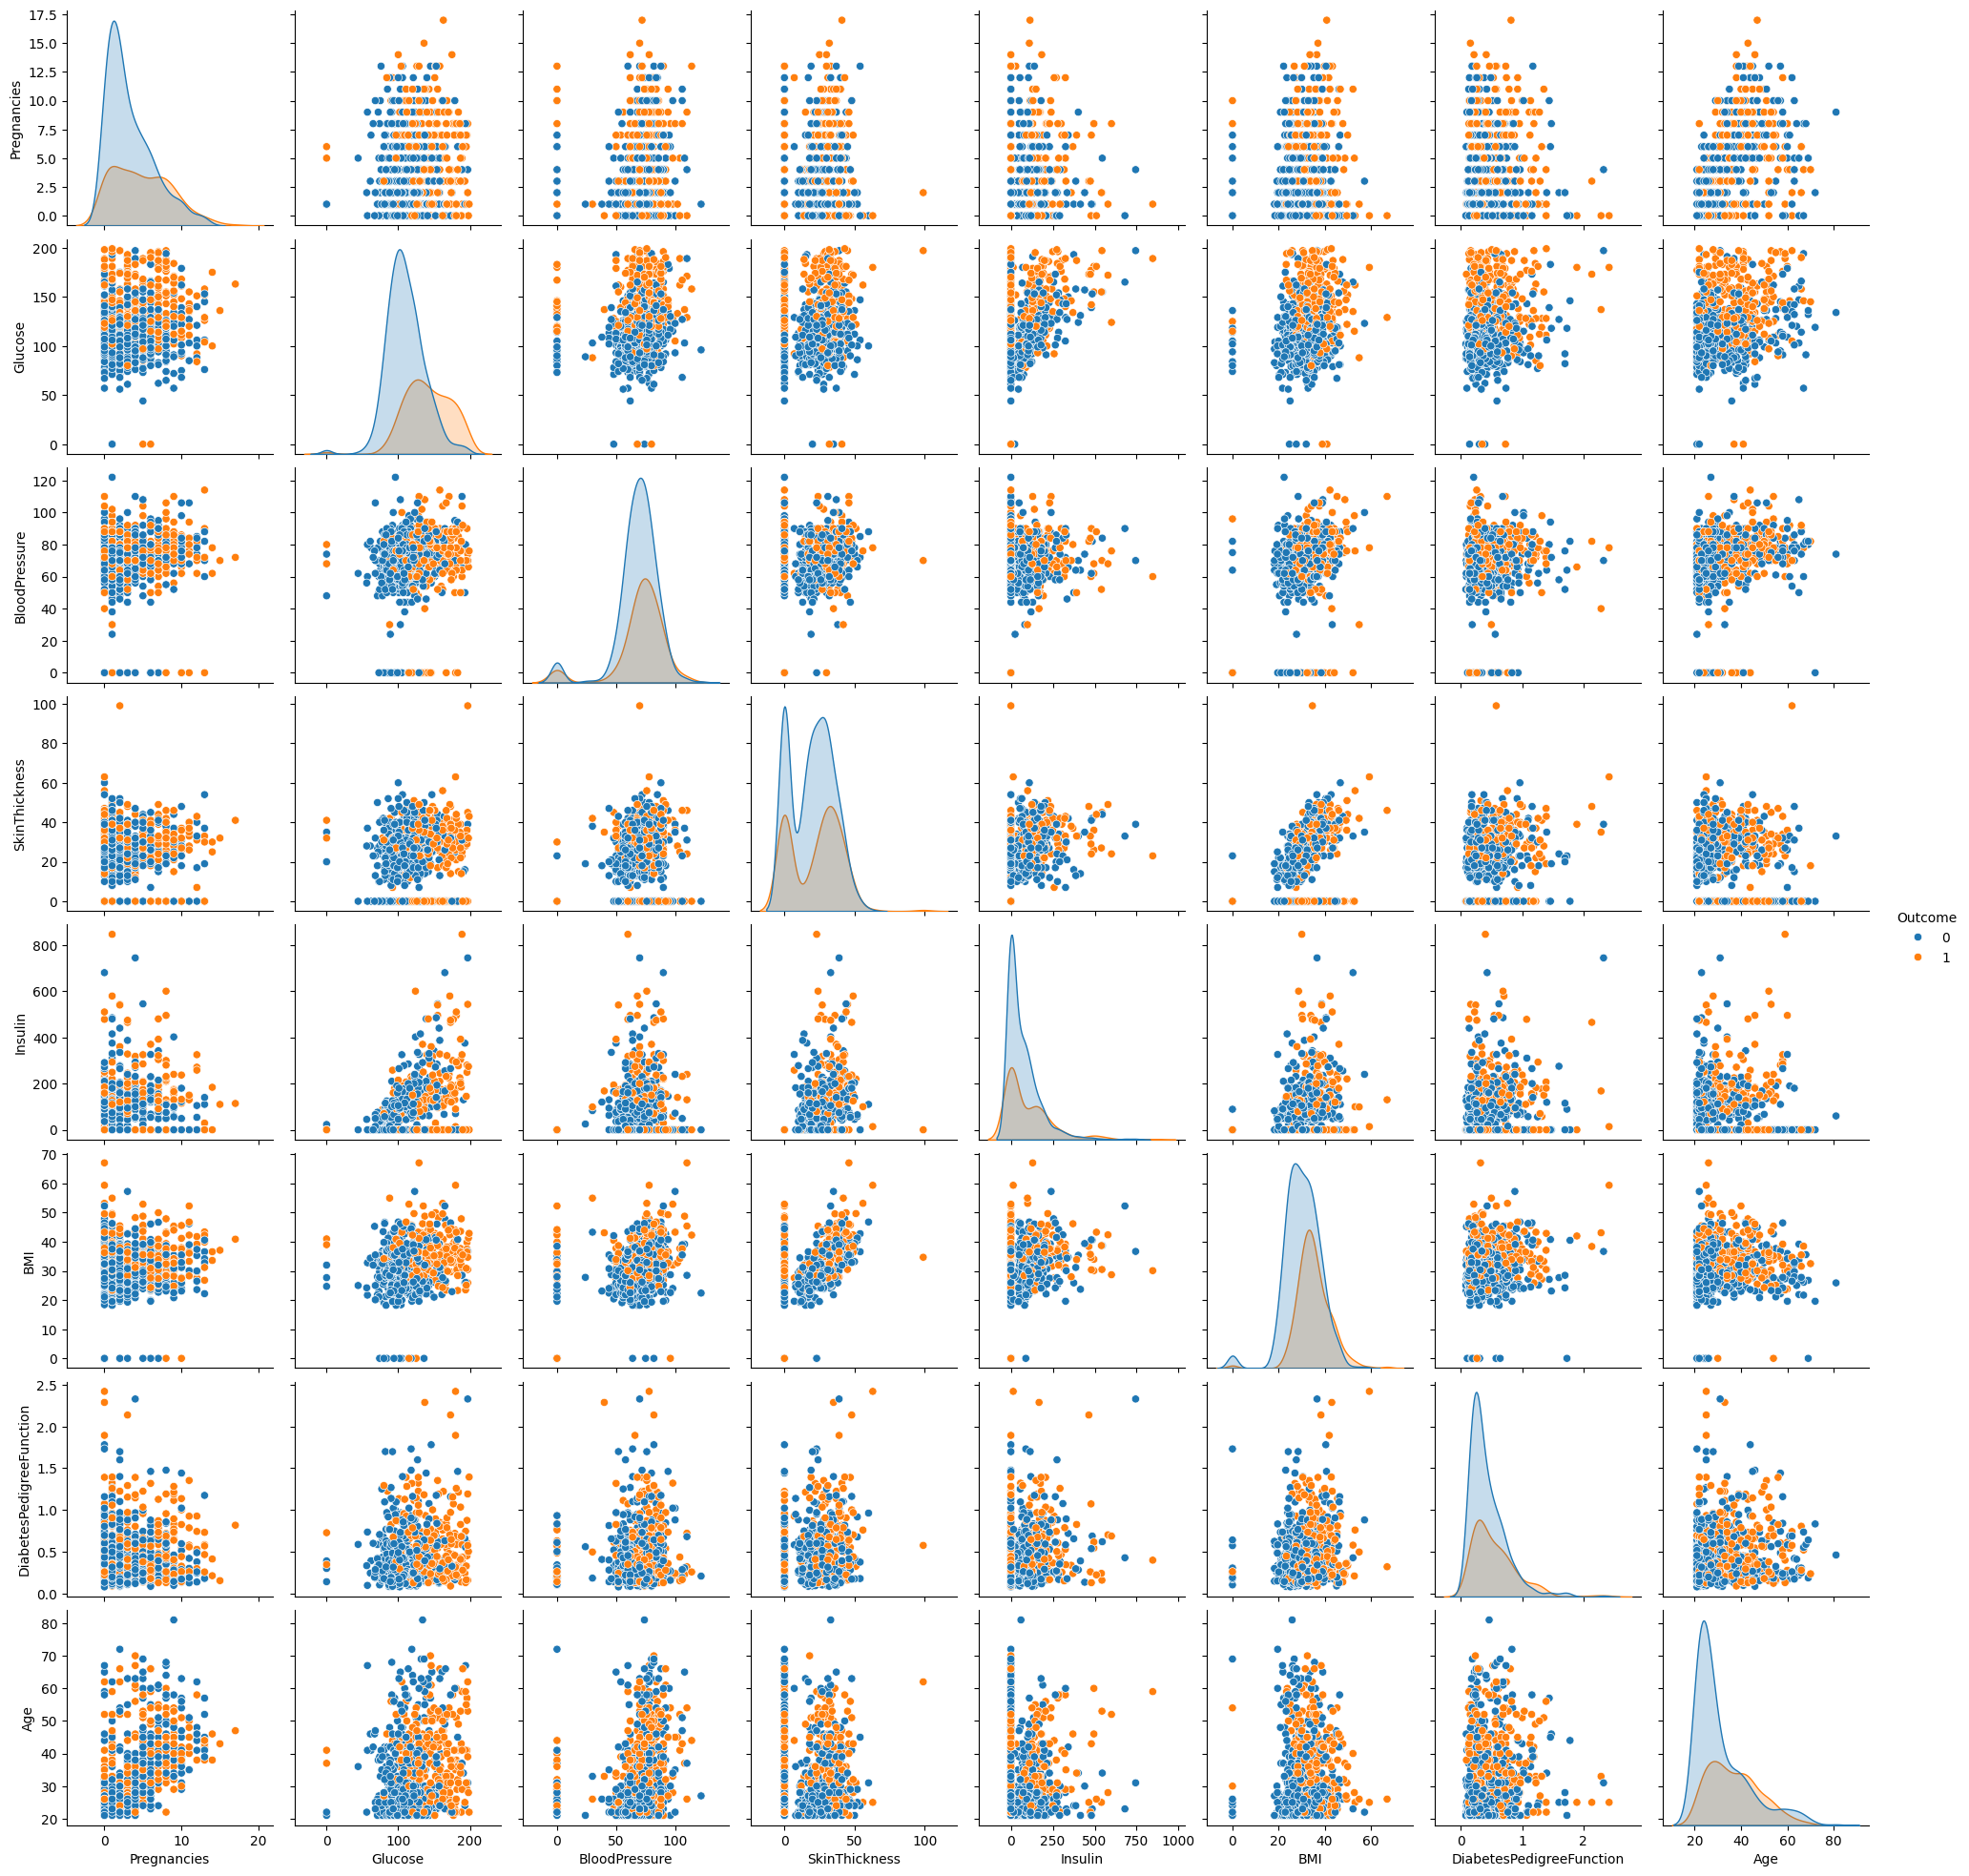

In [6]:
sns.pairplot(df, hue='Outcome')

# DATA PREPROCESSING

### SPLIT IN X(DEPENDENT) AND Y(INDEPENDENT)

In [7]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

### HANDLING CLASS IMBALANCE

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros =RandomOverSampler()
X,Y = ros.fit_resample(X,Y)

In [9]:
Y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

### DATA SCALING

In [10]:
from sklearn.preprocessing import StandardScaler
data_scalar = StandardScaler()
data_rescaled = data_scalar.fit_transform(X)
X = pd.DataFrame(data_rescaled, columns = X.columns)
print(X)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.570578  0.681776       0.111570       0.898800 -0.672848  0.105969   
1      -0.899984 -1.187729      -0.200223       0.532566 -0.672848 -0.798536   
2       1.158803  1.720390      -0.304154      -1.237566 -0.672848 -1.224946   
3      -0.899984 -1.069030      -0.200223       0.166331  0.106996 -0.604714   
4      -1.194097  0.355354      -1.551327       0.898800  0.720916  1.333513   
..           ...       ...            ...            ...       ...       ...   
995    -1.194097  1.661040       0.943018       1.448151  3.558222  1.359356   
996    -0.311759  1.304944       0.215501      -0.077825  0.364179 -0.372127   
997    -0.605872  0.266330       0.007639      -1.237566 -0.672848 -0.501342   
998     0.864691 -0.327163      -0.304154      -1.237566 -0.672848 -0.695164   
999     0.864691  1.067547       0.839087      -1.237566 -0.672848 -0.307519   

     DiabetesPedigreeFunction       Age

### Splitting into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
dia_en = pd.DataFrame()
res = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "F1 Score", "Recall", "ROC AUC"]
})

dia_en["Outcome"] = Y_test


In [12]:
print("Y_train",Y_train.value_counts())
print("Y_test",Y_test.value_counts())

Y_train Outcome
0    401
1    399
Name: count, dtype: int64
Y_test Outcome
1    101
0     99
Name: count, dtype: int64


## Importing Modules for Performance Metrices

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay


# Evaluating Models

## Traditional Machine Learning Models

### Logistic Regression

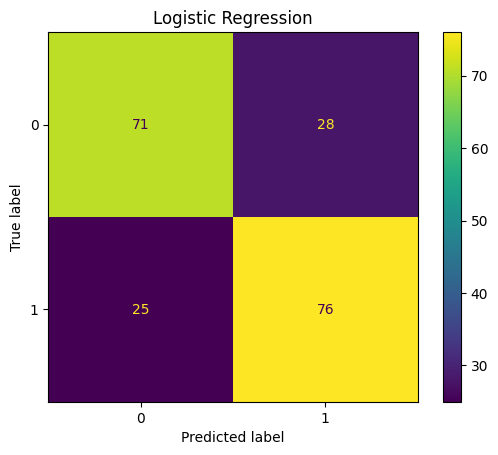

In [14]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

log_r = LogisticRegression()
log_r.fit(x_train, y_train)
log_r_pred = log_r.predict(x_test)

log_r_prec = precision_score(y_test, log_r_pred)
log_r_acc = accuracy_score(y_test, log_r_pred)
log_r_recall = recall_score(y_test, log_r_pred)
log_r_f1 = f1_score(y_test, log_r_pred)
log_r_fpr, log_r_tpr, log_r_thresholds = roc_curve(y_test, log_r_pred)
log_r_roc_auc = auc(log_r_fpr, log_r_tpr)

res["Log_R"] = pd.DataFrame({"Log_R":[log_r_acc, log_r_prec, log_r_f1, log_r_recall, log_r_roc_auc]})
cm =  confusion_matrix(y_test, log_r_pred, labels = log_r.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_r.classes_)
disp.plot()
plt.title("Logistic Regression")
plt.show()

### Decision Tree

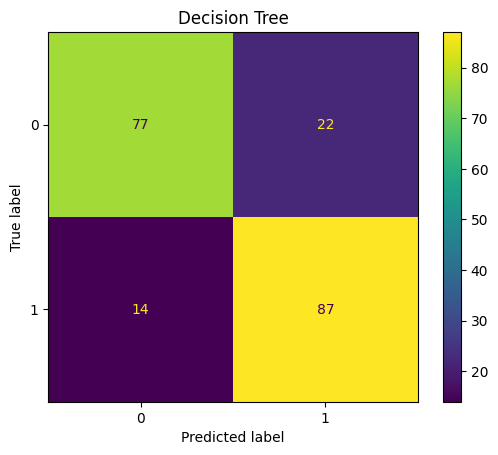

In [15]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_pred_prob = dt.predict_proba(x_test)

dt_prec = precision_score(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

res["DT"] = pd.DataFrame({"DT":[dt_acc, dt_prec, dt_f1, dt_recall, dt_roc_auc]})
cm = confusion_matrix(y_test, dt_pred, labels = dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.title("Decision Tree")
plt.show()



### knn

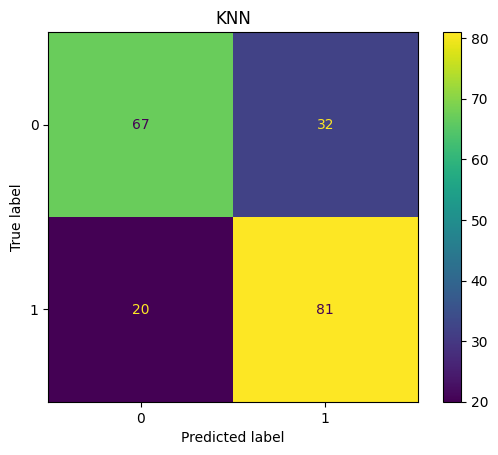

In [16]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

knn_prec = precision_score(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)

res["KNN"] = pd.DataFrame({"KNN":[knn_acc, knn_prec, knn_f1, knn_recall, knn_roc_auc]})
cm = confusion_matrix(y_test, knn_pred, labels = knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("KNN")
plt.show()



### Gaussian Naive Bayes

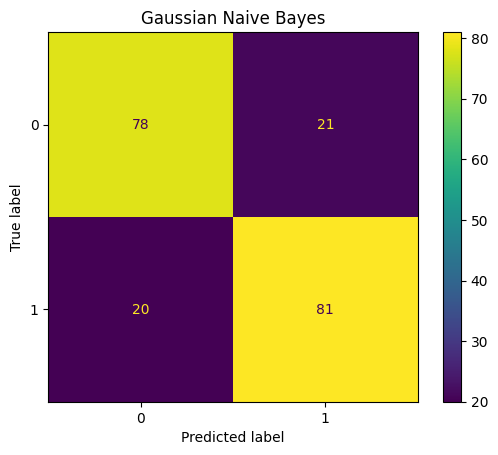

In [17]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

nb_prec = precision_score(y_test, nb_pred)
nb_acc = accuracy_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)

res["NB"] = pd.DataFrame({"NB":[nb_acc, nb_prec, nb_f1, nb_recall, nb_roc_auc]})
cm = confusion_matrix(y_test, nb_pred, labels = nb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.title("Gaussian Naive Bayes")
plt.show()



### SVM

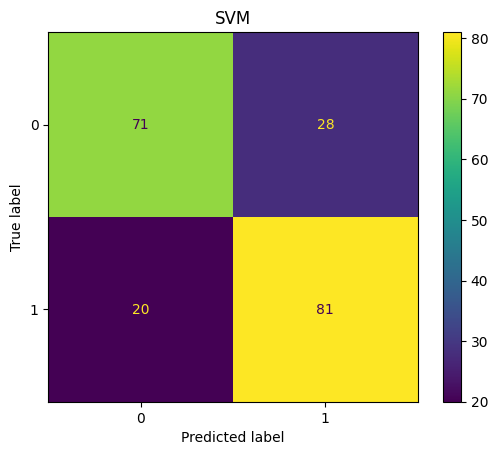

In [18]:
from sklearn.svm import SVC

svm = SVC(probability=True)  # Enable probability estimates for ROC curve
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

svm_prec = precision_score(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:, 1])
svm_roc_auc = auc(svm_fpr, svm_tpr)

res["SVM"] = pd.DataFrame({"SVM": [svm_acc, svm_prec, svm_f1, svm_recall, svm_roc_auc]})
cm = confusion_matrix(y_test, svm_pred, labels=svm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.title("SVM")
plt.show()


## Enseble Learning Models

### Random Forest

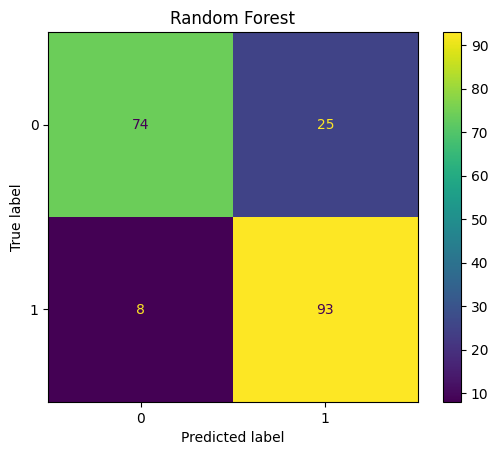

In [19]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

rf_prec = precision_score(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

res["RF"] = pd.DataFrame({"RF":[rf_acc, rf_prec, rf_f1, rf_recall, rf_roc_auc]})
cm = confusion_matrix(y_test, rf_pred, labels = rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title("Random Forest")
plt.show()



### Gradient Boosting Classifier

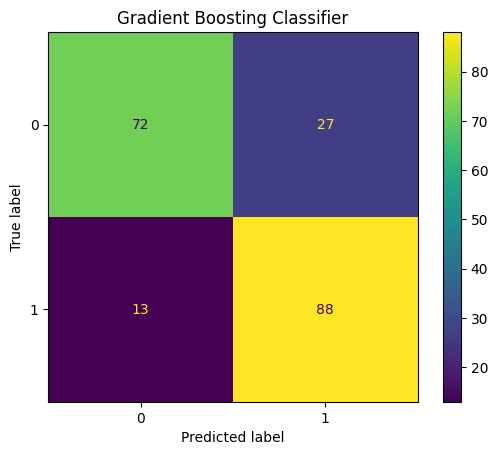

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

gb_prec = precision_score(y_test, gb_pred)
gb_acc = accuracy_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)

res["GB"] = pd.DataFrame({"GB":[gb_acc, gb_prec, gb_f1, gb_recall, gb_roc_auc]})
cm = confusion_matrix(y_test, gb_pred, labels = gb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot()
plt.title("Gradient Boosting Classifier")
plt.show()



### AdaBoost Classifier

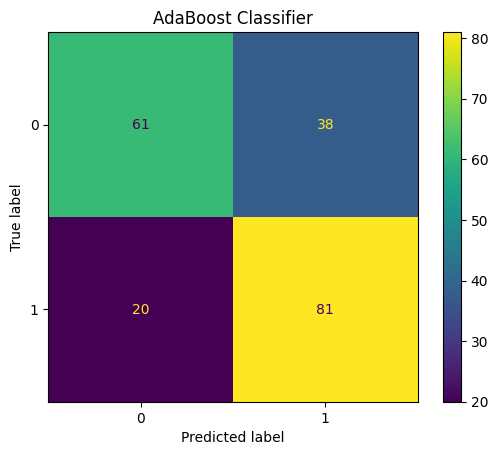

In [21]:
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

ab = AdaBoostClassifier(algorithm="SAMME")
ab.fit(x_train, y_train)
ab_pred = ab.predict(x_test)

ab_prec = precision_score(y_test, ab_pred)
ab_acc = accuracy_score(y_test, ab_pred)
ab_recall = recall_score(y_test, ab_pred)
ab_f1 = f1_score(y_test, ab_pred)
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_test, ab_pred)
ab_roc_auc = auc(ab_fpr, ab_tpr)

res["AB"] = pd.DataFrame({"AB":[ab_acc, ab_prec, ab_f1, ab_recall, ab_roc_auc]})
cm = confusion_matrix(y_test, ab_pred, labels = ab.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()
plt.title("AdaBoost Classifier")
plt.show()



## DEEP LEARNING

### ANN

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input, Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU,ELU

In [23]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Correct way to define input shape
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [24]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [25]:
model_history = model.fit(X_train, y_train, epochs=60, batch_size=13, validation_data=(X_test, y_test), verbose=1)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5707 - loss: 0.6850 - val_accuracy: 0.7200 - val_loss: 0.5942
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7221 - loss: 0.5786 - val_accuracy: 0.7350 - val_loss: 0.5101
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.4963 - val_accuracy: 0.7550 - val_loss: 0.4972
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.4996 - val_accuracy: 0.7500 - val_loss: 0.4953
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7803 - loss: 0.4746 - val_accuracy: 0.7500 - val_loss: 0.4988
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7547 - loss: 0.4915 - val_accuracy: 0.7550 - val_loss: 0.4865
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4430 - val_accuracy: 0.7350 - val_loss: 0.4979
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.4619 - val_accuracy: 0.7600 - val_loss

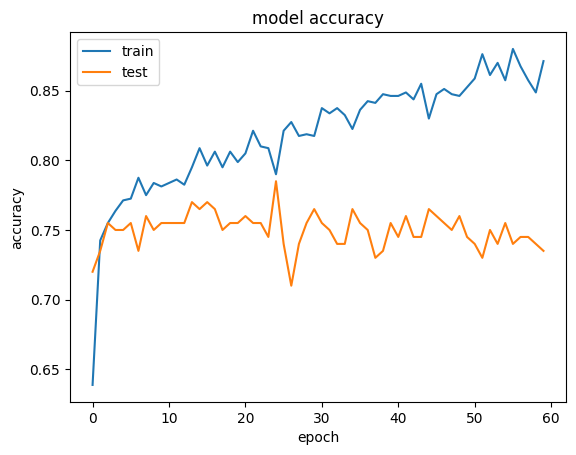

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

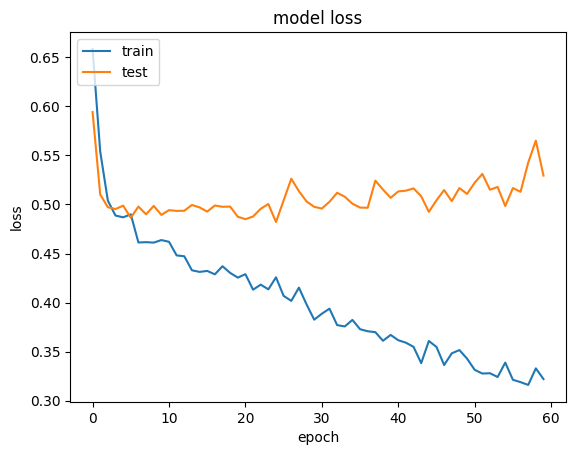

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
y_pred =model.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.735

In [30]:
model.evaluate(x_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.2567 


[0.25525417923927307, 0.9087499976158142]

In [31]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7391 - loss: 0.5267 


[0.5294591784477234, 0.7350000143051147]

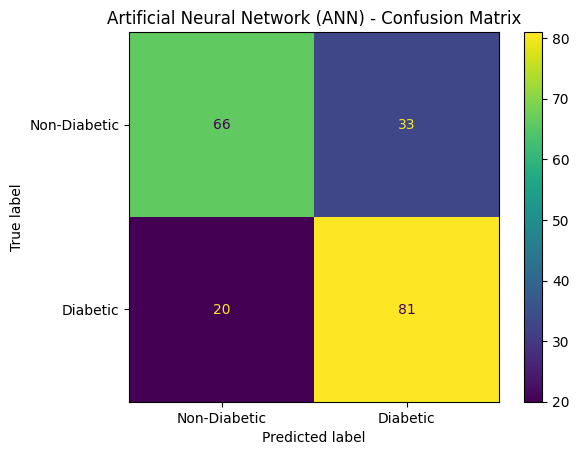

In [32]:
# Performance Metrics
ann_prec = precision_score(y_test, y_pred)
ann_acc = accuracy_score(y_test, y_pred)
ann_recall = recall_score(y_test, y_pred)
ann_f1 = f1_score(y_test, y_pred)
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)

# Store ANN results similar to Gradient Boosting
res["ANN"] = pd.DataFrame({"ANN": [ann_acc, ann_prec, ann_f1, ann_recall, ann_roc_auc]})

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])

# Plot Confusion Matrix
disp.plot()
plt.title("Artificial Neural Network (ANN) - Confusion Matrix")
plt.show()


# ROC

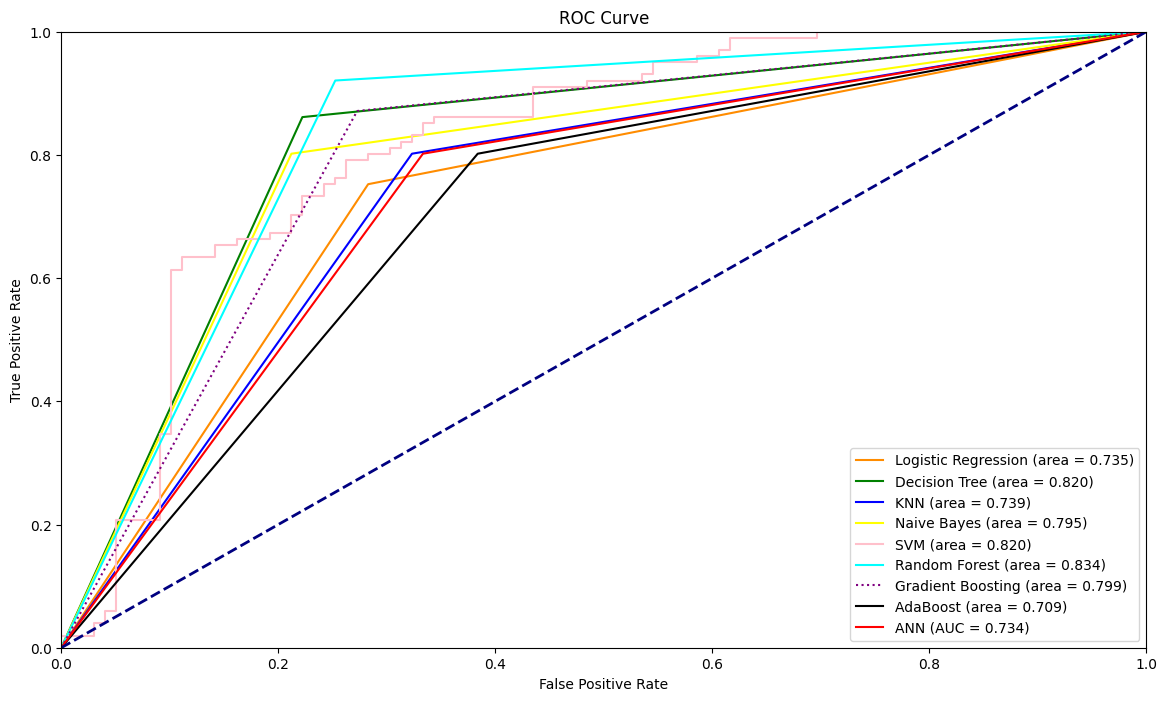

In [33]:
plt.figure(figsize=(14,8))

plt.plot(log_r_fpr, log_r_tpr, color='darkorange', label=f'Logistic Regression (area = {log_r_roc_auc:.3f})')
plt.plot(dt_fpr, dt_tpr, color='green', label=f'Decision Tree (area = {dt_roc_auc:.3f})')
plt.plot(knn_fpr, knn_tpr, color='blue', label=f'KNN (area = {knn_roc_auc:.3f})')
plt.plot(nb_fpr, nb_tpr, color='yellow', label=f'Naive Bayes (area = {nb_roc_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, color='pink', label=f'SVM (area = {svm_roc_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, color='cyan', linestyle='-', label=f'Random Forest (area = {rf_roc_auc:.3f})')
plt.plot(gb_fpr, gb_tpr, color='purple',linestyle=':', label=f'Gradient Boosting (area = {gb_roc_auc:.3f})')
plt.plot(ab_fpr, ab_tpr, color='black', label=f'AdaBoost (area = {ab_roc_auc:.3f})')
plt.plot(ann_fpr, ann_tpr, color='red', label=f'ANN (AUC = {ann_roc_auc:.3f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


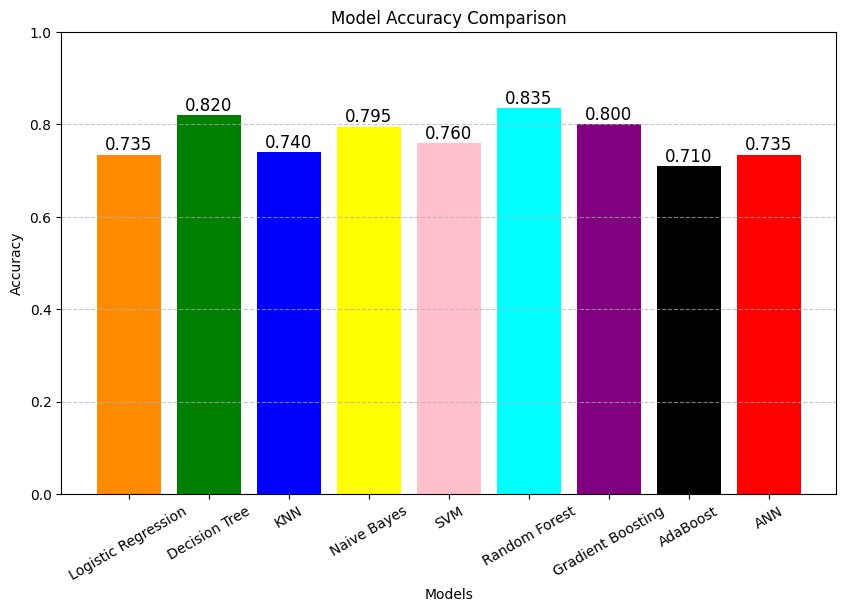

In [34]:
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'SVM',
          'Random Forest', 'Gradient Boosting', 'AdaBoost', 'ANN']
accuracies = [log_r_acc, dt_acc, knn_acc, nb_acc, svm_acc, rf_acc, gb_acc, ab_acc, ann_acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['darkorange', 'green', 'blue', 'yellow', 'pink',
                                    'cyan', 'purple', 'black', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=12)

plt.show()

### Saving Results

In [35]:
#res.to_csv("C:/Users/soumy/Python Project/PIMA Diabeties/pima_diabetes.csv")

In [36]:
res.set_index("Metric")

,Log_R,DT,KNN,NB,SVM,RF,GB,AB,ANN
Metric,,,,,,,,,
Accuracy,0.735000,0.820000,0.740000,0.795000,0.760000,0.835000,0.800000,0.710000,0.735000
Precision,0.730769,0.798165,0.716814,0.794118,0.743119,0.788136,0.765217,0.680672,0.710526
F1 Score,0.741463,0.828571,0.757009,0.798030,0.771429,0.849315,0.814815,0.736364,0.753488
Recall,0.752475,0.861386,0.801980,0.801980,0.801980,0.920792,0.871287,0.801980,0.801980
ROC AUC,0.734823,0.819582,0.739374,0.794929,0.819582,0.834133,0.799280,0.709071,0.734323


In [37]:
res.to_csv("C:/Users/soumy/Python Project/PIMA Diabeties/pima_diabetes_scaled.csv")